In [1]:
# Importing Libraries 
import numpy as np
import math
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from ampere_utils.plot import polar_plot

In [2]:
# The formula is in radians :(
np.sin(np.pi)

np.float64(1.2246467991473532e-16)

In [3]:
# Laading SuperDARN Files
SuperDARN_North_Data = xr.load_dataset(r"D:\OneDrive - Northumbria University - Production Azure AD\Documents - Internship with Harry Rumer\General\Data\SuperDARN\2015\SUPERDARN_PROCESSED_NORTH\Year_dataset\NORTH_2015_merged_dataset.nc")
SuperDARN_South_Data = xr.load_dataset(r"D:\OneDrive - Northumbria University - Production Azure AD\Documents - Internship with Harry Rumer\General\Data\SuperDARN\2015\SUPERDARN_PROCESSED_SOUTH\Year_dataset\SOUTH_2015_merged_dataset.nc")

In [4]:
# Loading AMPERE Files
Ampere_North_Data = xr.load_dataset(r"D:\OneDrive - Northumbria University - Production Azure AD\Documents - Internship with Harry Rumer\General\Data\AMPERE_PROCESSED_NORTH\Year_dataset\North_2015_merged_dataset.nc")
Ampere_South_Data = xr.load_dataset(r"D:\OneDrive - Northumbria University - Production Azure AD\Documents - Internship with Harry Rumer\General\Data\AMPERE_PROCESSED_SOUTH\Year_dataset\SOUTH_2015_merged_dataset.nc")

In [5]:
# Removing invalid values at 9999
SuperDARN_North_Data = SuperDARN_North_Data.where(SuperDARN_North_Data < 9990)
Ampere_North_Data = Ampere_North_Data.where(Ampere_North_Data <9990)

SuperDARN_South_Data = SuperDARN_South_Data.where(SuperDARN_South_Data < 9990)
Ampere_South_Data = Ampere_South_Data.where(Ampere_South_Data <9990)

In [6]:
def sin_in_degrees(degrees):
    # Convert degrees to radians
    radians = math.radians(degrees)
    # Compute the sine of the angle in radians
    return math.sin(radians)

## Conducitivity per time only

In [20]:
SuperDARN_North_Data = SuperDARN_North_Data.where(SuperDARN_North_Data < 9990)
Ampere_North_Data = Ampere_North_Data.where(Ampere_North_Data <9990)

SuperDARN_South_Data = SuperDARN_South_Data.where(SuperDARN_South_Data < 9990)
Ampere_South_Data = Ampere_South_Data.where(Ampere_South_Data <9990)

SuperDARN = SuperDARN_North_Data.x.values

Ampere_reshaped = Ampere_North_Data.x.values[:,:,0:40]

def sin_in_degrees(degrees):
    # Convert degrees to radians
    radians = math.radians(degrees)
    # Compute the sine of the angle in radians
    return math.sin(radians)

# Implementing John's Equation: 50 degress in radians is 0.872665 rad, 40 degrees in radians is 0.698132 rad.
Conductivity_array = []

Re = 6371
for i in range(0,262800):
    # Ampere --- Step 1) Rlat
    ampere_Rlat = sin_in_degrees(40) * Re
    
    # Ampere --- Step 2) d phi
    Ampere_dphi = ampere_Rlat * np.pi / 180
    
    # Ampere --- Step 3) d theta
    Ampere_dtheta = np.pi*Re/180
    
    # Ampere --- Step 4) Area
    Ampere_area = Ampere_dtheta*Ampere_dphi*15
    
    # Ampere -- Step 5) Calculating Current
    Current_density = np.nansum(Ampere_reshaped[i,:,:])
    Ampere_current = Current_density * Ampere_area
    
    ######################################################################################################################################
    
    # SuperDARN ---- Step 1) Rlat
    SuperDARN_Rlat = sin_in_degrees(40) * Re
    
    # SuperDARN --- Step 2) d phi
    SuperDARN_dphi = SuperDARN_Rlat*np.pi/180
    
    # SuperDARN --- Step 3) d theta 
    SuperDARN_dtheta = np.pi*Re/180
    
    # SuperDARN --- Step 4) Area
    SuperDARN_area = SuperDARN_dtheta*SuperDARN_dphi*15
    
    # SuperDARN --- Step 5) Calculating Current/Conductivity
    Vorticity = np.nansum(SuperDARN[i,:,:])
    SuperDARN_Current_per_Conduct = Vorticity * SuperDARN_area
    
    ######################################################################################################################################
    
    Conductivity = 1 / (SuperDARN_Current_per_Conduct / Ampere_current)

# Append the row of conductivity values for the current time stamp
    Conductivity_array.append(Conductivity)

# Convert the list to a NumPy array with shape (262800)
Conductivity_array = np.array(Conductivity_array)

C:\Users\Furio\AppData\Local\Temp\ipykernel_13960\3769391148.py:58: RuntimeWarning: divide by zero encountered in scalar divide
  Conductivity = 1 / (SuperDARN_Current_per_Conduct / Ampere_current)
C:\Users\Furio\AppData\Local\Temp\ipykernel_13960\3769391148.py:58: RuntimeWarning: invalid value encountered in scalar divide
  Conductivity = 1 / (SuperDARN_Current_per_Conduct / Ampere_current)


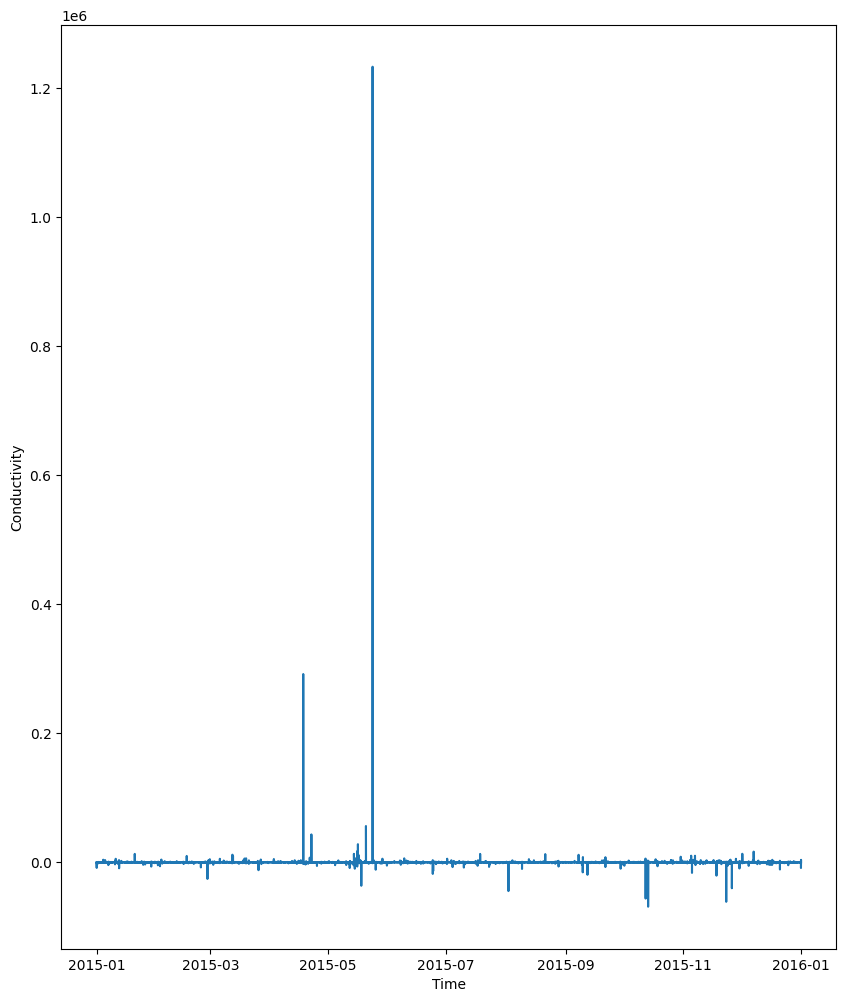

In [21]:
time = SuperDARN_North_Data.x.time
time

plt.figure(figsize = (10,12))
plt.plot(time,Conductivity_array)
plt.xlabel("Time")
plt.ylabel("Conductivity")
plt.savefig("Conductivity.png")

## Conductivity per time and colat 

In [23]:
SuperDARN_North_Data = SuperDARN_North_Data.where(SuperDARN_North_Data < 9990)
Ampere_North_Data = Ampere_North_Data.where(Ampere_North_Data <9990)

SuperDARN_South_Data = SuperDARN_South_Data.where(SuperDARN_South_Data < 9990)
Ampere_South_Data = Ampere_South_Data.where(Ampere_South_Data <9990)

SuperDARN = SuperDARN_North_Data.x.values

Ampere_reshaped = Ampere_North_Data.x.values[:,:,0:40]

def sin_in_degrees(degrees):
    # Convert degrees to radians
    radians = math.radians(degrees)
    # Compute the sine of the angle in radians
    return math.sin(radians)

# Implementing John's Equation: 50 degress in radians is 0.872665 rad, 40 degrees in radians is 0.698132 rad.
Conductivity_array = []

Re = 6371
for i in range(0,262800):
    conductivity_row = []
    for j in range(0,40):
        # Ampere --- Step 1) Rlat
        ampere_Rlat = sin_in_degrees(j) * Re
        
        # Ampere --- Step 2) d phi
        Ampere_dphi = ampere_Rlat * np.pi / 180
        
        # Ampere --- Step 3) d theta
        Ampere_dtheta = np.pi*Re/180
        
        # Ampere --- Step 4) Area
        Ampere_area = Ampere_dtheta*Ampere_dphi*15
        
        # Ampere -- Step 5) Calculating Current
        Current_density = np.nansum(Ampere_reshaped[i,:,j])
        Ampere_current = Current_density * Ampere_area
        
        ######################################################################################################################################
        
        # SuperDARN ---- Step 1) Rlat
        SuperDARN_Rlat = sin_in_degrees(j) * Re
        
        # SuperDARN --- Step 2) d phi
        SuperDARN_dphi = SuperDARN_Rlat*np.pi/180
        
        # SuperDARN --- Step 3) d theta 
        SuperDARN_dtheta = np.pi*Re/180
        
        # SuperDARN --- Step 4) Area
        SuperDARN_area = SuperDARN_dtheta*SuperDARN_dphi*15
        
        # SuperDARN --- Step 5) Calculating Current/Conductivity
        Vorticity = np.nansum(SuperDARN[i,:,j])
        SuperDARN_Current_per_Conduct = Vorticity * SuperDARN_area
        
        ######################################################################################################################################
        
        Conductivity = 1 / (SuperDARN_Current_per_Conduct / Ampere_current)
        conductivity_row.append(Conductivity)
    
    # Append the row of conductivity values for the current time stamp
    Conductivity_array.append(conductivity_row)

# Convert the list to a NumPy array with shape (262800, 40)
Conductivity_array = np.array(Conductivity_array)

C:\Users\Furio\AppData\Local\Temp\ipykernel_13960\318232664.py:60: RuntimeWarning: invalid value encountered in scalar divide
  Conductivity = 1 / (SuperDARN_Current_per_Conduct / Ampere_current)
C:\Users\Furio\AppData\Local\Temp\ipykernel_13960\318232664.py:60: RuntimeWarning: divide by zero encountered in scalar divide
  Conductivity = 1 / (SuperDARN_Current_per_Conduct / Ampere_current)


In [24]:
np.shape(Conductivity_array)

(262800, 40)

In [25]:
Conductivity_array

array([[        nan,         inf,         inf, ...,  0.87362167,
         0.4457574 ,         inf],
       [        nan,         inf,         inf, ...,  0.75004333,
         0.32562904,         inf],
       [        nan,         inf,         inf, ..., -0.24961889,
         0.15291349,         inf],
       ...,
       [        nan, 44.5493727 , 43.19446593, ..., -0.70861438,
        -0.28091953,         inf],
       [        nan,        -inf,        -inf, ...,        -inf,
               -inf,        -inf],
       [        nan,        -inf,        -inf, ...,        -inf,
               -inf,        -inf]])

In [26]:
SuperDARN_dphi

69.97723471871168

In [27]:
SuperDARN_dtheta

111.19492664455873

In [28]:
print(len(Conductivity_array))

262800


In [29]:
time = SuperDARN_North_Data.x.time
time

<xarray.DataArray 'time' (time: 262800)> Size: 2MB
array(['2015-01-01T00:00:00.000000000', '2015-01-01T00:02:00.000000000',
       '2015-01-01T00:04:00.000000000', ..., '2015-12-31T23:54:00.000000000',
       '2015-12-31T23:56:00.000000000', '2015-12-31T23:58:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2MB 2015-01-01 ... 2015-12-31T23:58:00

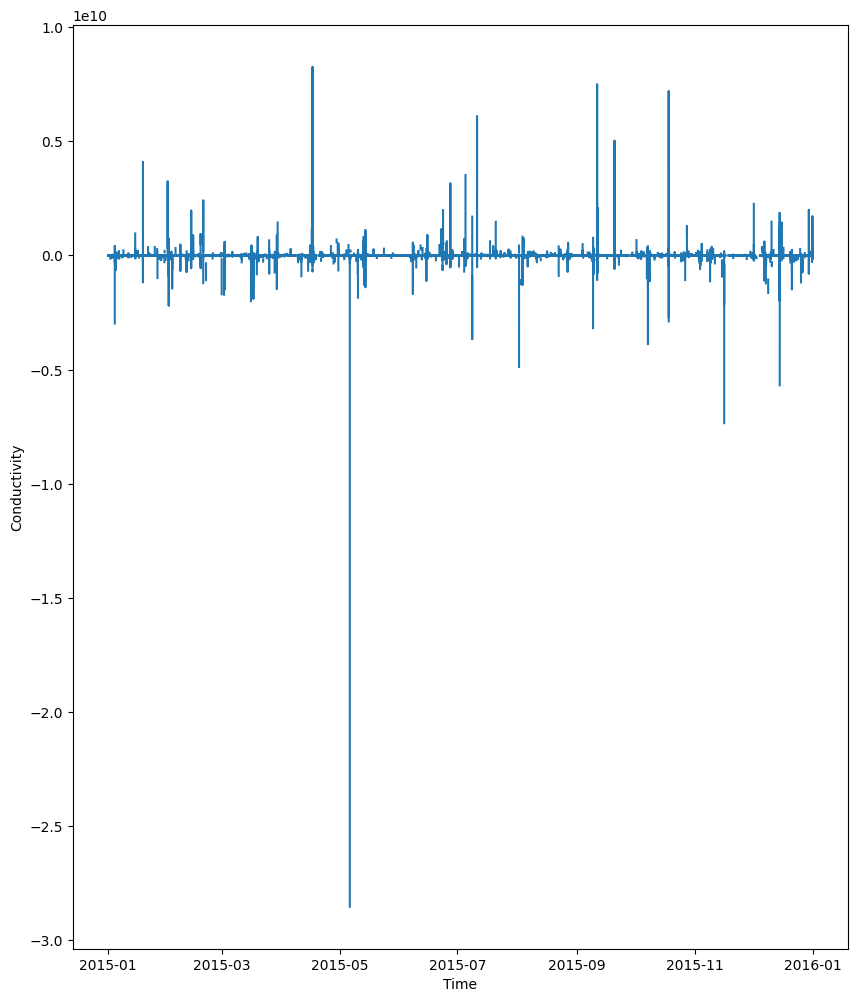

In [30]:
plt.figure(figsize = (10,12))
plt.plot(time,Conductivity_array[:,1])
plt.xlabel("Time")
plt.ylabel("Conductivity")
plt.savefig("Conductivity.png")

In [ ]:
# Keograms 
x_colorbar_limit = 10 #max(abs(dawn_j.min()), abs(dawn_j.max()), abs(dusk_j.min()), abs(dusk_j.max()))
x_norm = mcolors.TwoSlopeNorm(vmin=-x_colorbar_limit, vcenter=0, vmax=x_colorbar_limit)
colat = np.arange(0,40,1)

plt.figure(figsize=(15,8))
plt.pcolormesh(time,colat,Conductivity_array.T, cmap = "RdBu_r",norm = x_norm)
plt.ylabel("Colat")
plt.xlabel("Time")
plt.colorbar(extend="both")
plt.tight_layout()
plt.savefig("Conductivity Keogram.png")
plt.show()